In [64]:
import pandas as pd # for data manipulation
import numpy as np
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from imblearn.over_sampling  import RandomOverSampler
from imblearn.over_sampling  import SMOTE
from imblearn.under_sampling  import RandomUnderSampler

import matplotlib.pyplot as plt

# Differnt types of Naive Bayes Classifiers
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [65]:
df = pd.read_csv('heart_2020_cleaned.csv')

print(df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].head())

df['BMI'] = pd.qcut(df['BMI'], 6, duplicates='drop')
df['PhysicalHealth'] = pd.qcut(df['PhysicalHealth'], 15, duplicates='drop')
df['MentalHealth'] = pd.qcut(df['MentalHealth'], 12, duplicates='drop')
df['SleepTime'] = pd.qcut(df['SleepTime'], 12, duplicates='drop')

print(df[['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].head())

     BMI  PhysicalHealth  MentalHealth  SleepTime
0  16.60             3.0          30.0        5.0
1  20.34             0.0           0.0        7.0
2  26.58            20.0          30.0        8.0
3  24.21             0.0           0.0        6.0
4  23.71            28.0           0.0        8.0
               BMI PhysicalHealth   MentalHealth     SleepTime
0  (12.019, 22.74]     (1.0, 3.0]   (17.0, 30.0]  (0.999, 5.0]
1  (12.019, 22.74]  (-0.001, 1.0]  (-0.001, 1.0]    (6.0, 7.0]
2   (25.09, 27.34]    (7.0, 25.0]   (17.0, 30.0]    (7.0, 8.0]
3   (22.74, 25.09]  (-0.001, 1.0]  (-0.001, 1.0]    (5.0, 6.0]
4   (22.74, 25.09]   (25.0, 30.0]  (-0.001, 1.0]    (7.0, 8.0]


In [66]:
y = df['HeartDisease']
x = df.drop('HeartDisease', axis=1)

#print(x[['BMI','Smoking','AlcoholDrinking','Stroke']].head())

enc = LabelEncoder()
y = enc.fit_transform(y)

enc = OrdinalEncoder()
x = enc.fit_transform(x)

#for i in range(5):
#    print(x[i,[0,1,2,3]])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

sampler = RandomUnderSampler(sampling_strategy=1)
x_train, y_train = sampler.fit_resample(x_train, y_train)


Model:  CategoricalNB()
Classification Report:

               precision    recall  f1-score   support

non-diseased       0.97      0.77      0.86     29265
    diseased       0.23      0.71      0.34      2715

    accuracy                           0.77     31980
   macro avg       0.60      0.74      0.60     31980
weighted avg       0.90      0.77      0.82     31980



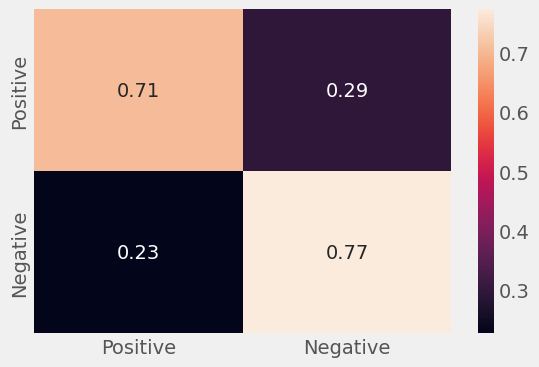

In [67]:
model = CategoricalNB()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

nbreport = classification_report(y_test, y_pred, target_names=['non-diseased','diseased'], output_dict=True)

print("Model: ", model)
print('Classification Report:\n\n', classification_report(y_test, y_pred, target_names=['non-diseased','diseased']))

mat = confusion_matrix(y_test, y_pred, labels=[1,0], normalize='true')

df_cm = pd.DataFrame(mat, index = ['Positive', 'Negative'], columns = ['Positive', 'Negative'])
plt.figure(dpi=100)
plt.style.use('fivethirtyeight')
plt.title('Naive bayes')

sn.heatmap(df_cm, annot=True)

plt.savefig('fig/naivebayes.png', bbox_inches='tight')
plt.show()


Model:  DecisionTreeClassifier()
Classification Report:

               precision    recall  f1-score   support

non-diseased       0.96      0.70      0.81     29265
    diseased       0.17      0.65      0.26      2715

    accuracy                           0.69     31980
   macro avg       0.56      0.67      0.54     31980
weighted avg       0.89      0.69      0.76     31980



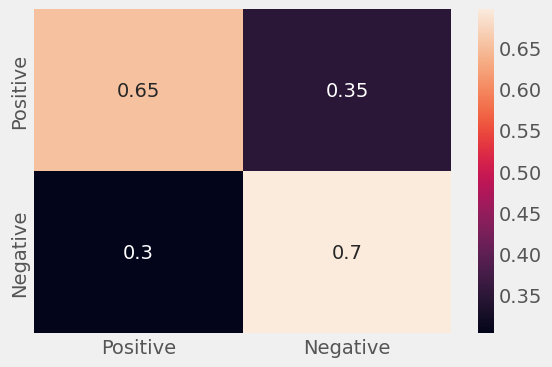

In [68]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

dtreport = classification_report(y_test, y_pred, target_names=['non-diseased','diseased'], output_dict=True)

print("Model: ", model)
print('Classification Report:\n\n', classification_report(y_test, y_pred, target_names=['non-diseased','diseased']))

mat = confusion_matrix(y_test, y_pred, labels=[1,0], normalize='true')

df_cm = pd.DataFrame(mat, index = ['Positive', 'Negative'], columns = ['Positive', 'Negative'])
plt.figure(dpi=100)
plt.style.use('fivethirtyeight')
plt.title('Decision tree')

sn.heatmap(df_cm, annot=True)

plt.savefig('fig/decisiontree.png', bbox_inches='tight')
plt.show()


Model:  RandomForestClassifier()
Classification Report:

               precision    recall  f1-score   support

non-diseased       0.97      0.72      0.82     29265
    diseased       0.20      0.77      0.32      2715

    accuracy                           0.72     31980
   macro avg       0.59      0.74      0.57     31980
weighted avg       0.91      0.72      0.78     31980



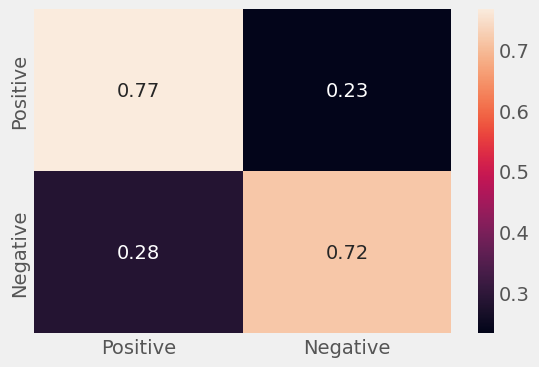

In [69]:
model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

rfreport = classification_report(y_test, y_pred, target_names=['non-diseased','diseased'], output_dict=True)

print("Model: ", model)
print('Classification Report:\n\n', classification_report(y_test, y_pred, target_names=['non-diseased','diseased']))

mat = confusion_matrix(y_test, y_pred, labels=[1,0], normalize='true')

df_cm = pd.DataFrame(mat, index = ['Positive', 'Negative'], columns = ['Positive', 'Negative'])
plt.figure(dpi=100)
plt.style.use('fivethirtyeight')
plt.title('Random forest')

sn.heatmap(df_cm, annot=True)

plt.savefig('fig/randomforest.png', bbox_inches='tight')
plt.show()


Model:  KNeighborsClassifier()
Classification Report:

               precision    recall  f1-score   support

non-diseased       0.95      0.84      0.89     29265
    diseased       0.23      0.50      0.31      2715

    accuracy                           0.81     31980
   macro avg       0.59      0.67      0.60     31980
weighted avg       0.89      0.81      0.84     31980



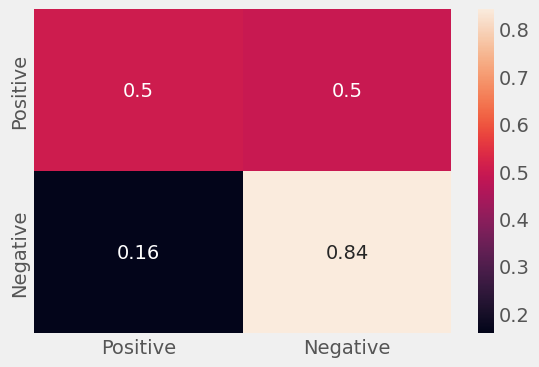

In [76]:
model = KNeighborsClassifier()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

knreport = classification_report(y_test, y_pred, target_names=['non-diseased','diseased'], output_dict=True)

print("Model: ", model)
print('Classification Report:\n\n', classification_report(y_test, y_pred, target_names=['non-diseased','diseased']))

mat = confusion_matrix(y_test, y_pred, labels=[1,0], normalize='true')

df_cm = pd.DataFrame(mat, index = ['Positive', 'Negative'], columns = ['Positive', 'Negative'])
plt.figure(dpi=100)
plt.style.use('fivethirtyeight')
plt.title('K-nearest neighbors')
sn.heatmap(df_cm, annot=True)

plt.savefig('fig/knearest.png', bbox_inches='tight')
plt.show()


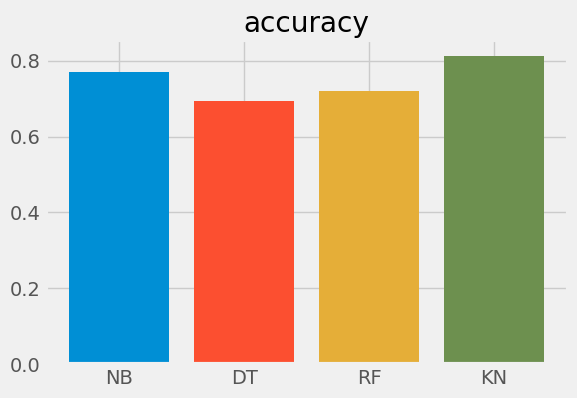

<Figure size 432x288 with 0 Axes>

In [74]:
plt.style.use('fivethirtyeight')
plt.figure(dpi=100)

plt.bar('NB', nbreport['accuracy'])

plt.bar('DT', dtreport['accuracy'])

plt.bar('RF', rfreport['accuracy'])

plt.bar('KN', knreport['accuracy'])

plt.title('accuracy')

plt.savefig('fig/accuracy.png', bbox_inches='tight')
plt.show()


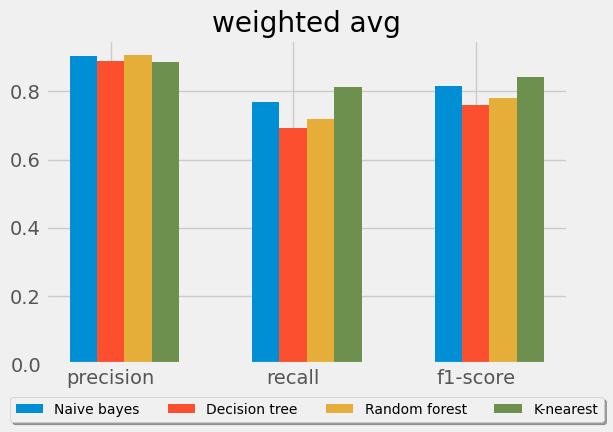

<Figure size 432x288 with 0 Axes>

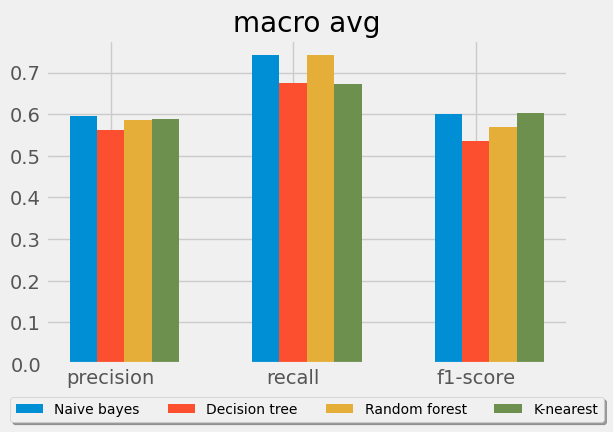

<Figure size 432x288 with 0 Axes>

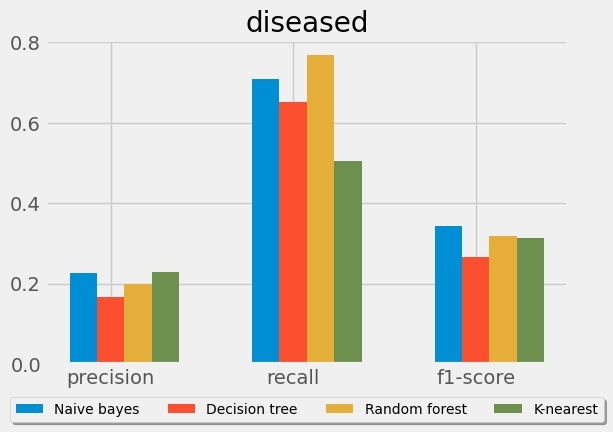

<Figure size 432x288 with 0 Axes>

In [73]:
x_axis = ['precision', 'recall', 'f1-score']
x_indexes = np.arange(len(x_axis))
width = 0.15

columns = ['weighted avg', 'macro avg', 'diseased']

for column in columns:
    plt.style.use('fivethirtyeight')
    plt.figure(dpi=100)

    y_axis = [nbreport[column]['precision'], nbreport[column]
              ['recall'], nbreport[column]['f1-score']]
    plt.bar(x_indexes - width, y_axis, width=width, label='Naive bayes')

    y_axis = [dtreport[column]['precision'], dtreport[column]
              ['recall'], dtreport[column]['f1-score']]
    plt.bar(x_indexes, y_axis, width=width, label='Decision tree')

    y_axis = [rfreport[column]['precision'], rfreport[column]
              ['recall'], rfreport[column]['f1-score']]
    plt.bar(x_indexes + width, y_axis, width=width, label='Random forest')

    y_axis = [knreport[column]['precision'], knreport[column]
              ['recall'], knreport[column]['f1-score']]
    plt.bar(x_indexes + 2 * width, y_axis, width=width, label='K-nearest')

    plt.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.08),
               fancybox=True, shadow=True, ncol=5)
    plt.title(column)
    plt.xticks(x_indexes, x_axis)

    plt.savefig('fig/%s.png'% (column), bbox_inches='tight')
    plt.show()
